# Crop Yields Analysis

This Jupyter Notebook contains an analysis of crop yields data from various regions. The data is loaded from a CSV file and various analyses and visualizations are performed to understand the distribution and relationships between different variables.

## Data Loading and Cleaning

The data is loaded from a CSV file located at `~/Downloads/crop_yields.csv`. Missing values are handled by filling them with 0.

Each member contributed to different parts of the analysis and visualization:

- **Maurice**: Data loading and cleaning, idea of treemap, summary, etc
- **Javier**: EDA
- **Zach**: Analysis of india

Team:

Maurice S. Gleiser Gherson
Zach Guccione
Javier Sayles
Rishab Deswal
M.T. Wilson

In [1]:
#Maurice
import pandas as pd

# Load the data from the CSV file
file_path = '~/Downloads/crop_yields.csv'
crop_yields_df = pd.read_csv(file_path)

# Check for missing values
missing_values = crop_yields_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handle missing values (example: fill with 0)
crop_yields_df_filled = crop_yields_df.fillna(0)

# Display the cleaned dataframe
crop_yields_df_filled.head()

Missing values in each column:
 record_num                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


,record_num,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [2]:
#Maurice

# Display the current data types of the columns
print("Current data types:\n", crop_yields_df.dtypes)

# Possible conversions:
# - 'record_num' and 'Year' could be converted to 'category' if they have a limited number of unique values.
# - 'Area' and 'Item' could be converted to 'category' as they are categorical data.

# Example of converting columns to 'category' data type
crop_yields_df['record_num'] = crop_yields_df['record_num'].astype('category')
crop_yields_df['Year'] = crop_yields_df['Year'].astype('category')
crop_yields_df['Area'] = crop_yields_df['Area'].astype('category')
crop_yields_df['Item'] = crop_yields_df['Item'].astype('category')

# Display the updated data types
print("Updated data types:\n", crop_yields_df.dtypes)

# Save the updated dataframe back to the CSV file
crop_yields_df.to_csv(file_path, index=False)

Current data types:
 record_num                         int64
Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year      int64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object
Updated data types:
 record_num                       category
Area                             category
Item                             category
Year                             category
hg/ha_yield                         int64
average_rain_fall_mm_per_year       int64
pesticides_tonnes                 float64
avg_temp                          float64
dtype: object


In [9]:
#Maurice
# Generate summary statistics for the crop_yields_df dataframe
summary_statistics = crop_yields_df.describe(include='all')
print("Summary Statistics:\n", summary_statistics)

Summary Statistics:
         record_num   Area      Item     Year    hg/ha_yield  \
count      28242.0  28242     28242  28242.0   28242.000000   
unique     28242.0    101        10     23.0            NaN   
top            0.0  India  Potatoes   2012.0            NaN   
freq           1.0   4048      4276   1260.0            NaN   
mean           NaN    NaN       NaN      NaN   77053.332094   
std            NaN    NaN       NaN      NaN   84956.612897   
min            NaN    NaN       NaN      NaN      50.000000   
25%            NaN    NaN       NaN      NaN   19919.250000   
50%            NaN    NaN       NaN      NaN   38295.000000   
75%            NaN    NaN       NaN      NaN  104676.750000   
max            NaN    NaN       NaN      NaN  501412.000000   

        average_rain_fall_mm_per_year  pesticides_tonnes      avg_temp  
count                     28242.00000       28242.000000  28242.000000  
unique                            NaN                NaN           NaN  
top

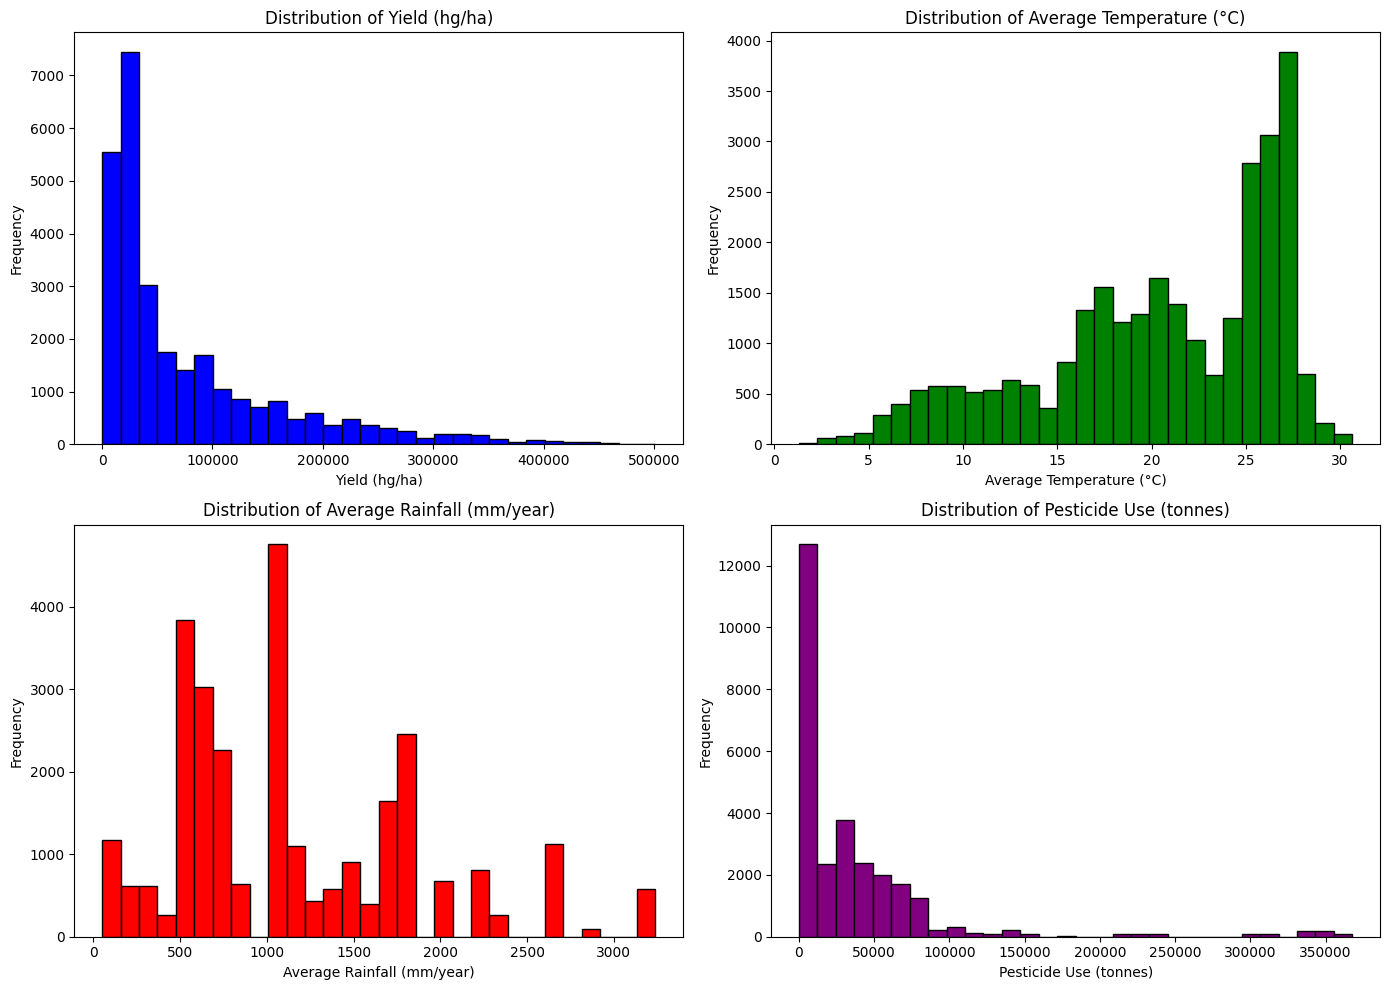

In [4]:
#Maurice
import matplotlib.pyplot as plt

# Plot histograms for key variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for yield
axes[0, 0].hist(crop_yields_df['hg/ha_yield'], bins=30, color='blue', edgecolor='black')
axes[0, 0].set_title('Distribution of Yield (hg/ha)')
axes[0, 0].set_xlabel('Yield (hg/ha)')
axes[0, 0].set_ylabel('Frequency')

# Histogram for average temperature
axes[0, 1].hist(crop_yields_df['avg_temp'], bins=30, color='green', edgecolor='black')
axes[0, 1].set_title('Distribution of Average Temperature (°C)')
axes[0, 1].set_xlabel('Average Temperature (°C)')
axes[0, 1].set_ylabel('Frequency')

# Histogram for average rainfall
axes[1, 0].hist(crop_yields_df['average_rain_fall_mm_per_year'], bins=30, color='red', edgecolor='black')
axes[1, 0].set_title('Distribution of Average Rainfall (mm/year)')
axes[1, 0].set_xlabel('Average Rainfall (mm/year)')
axes[1, 0].set_ylabel('Frequency')

# Histogram for pesticide use
axes[1, 1].hist(crop_yields_df['pesticides_tonnes'], bins=30, color='purple', edgecolor='black')
axes[1, 1].set_title('Distribution of Pesticide Use (tonnes)')
axes[1, 1].set_xlabel('Pesticide Use (tonnes)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

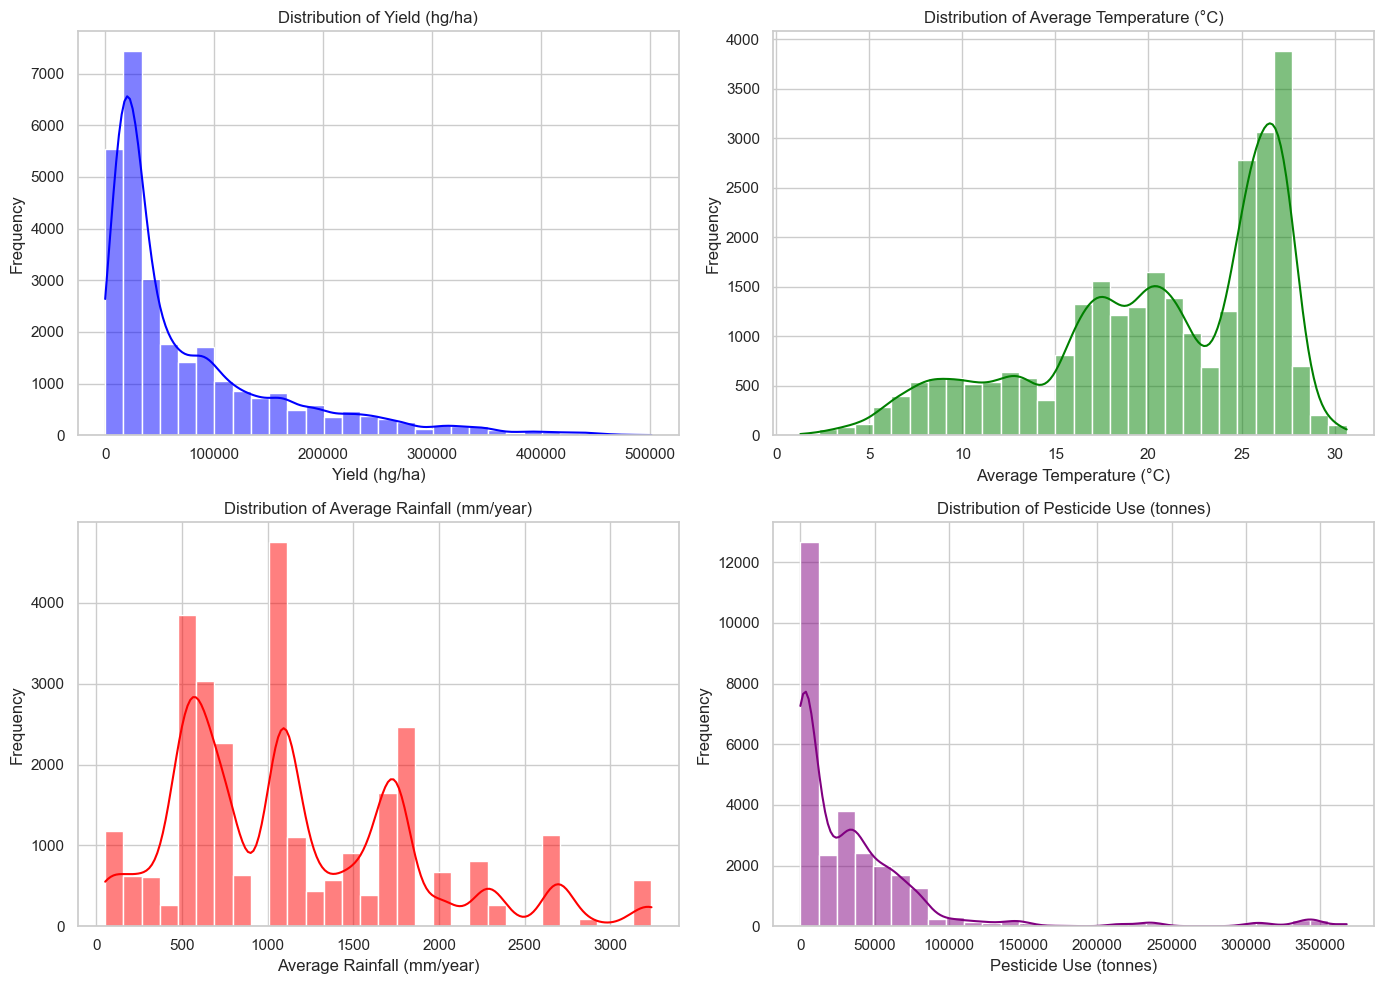

Text(711.8125, 0.5, 'Yield (hg/ha)')

In [5]:
#Maurice
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot histograms for key variables with seaborn
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for yield
sns.histplot(crop_yields_df['hg/ha_yield'], bins=30, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Yield (hg/ha)')
axes[0, 0].set_xlabel('Yield (hg/ha)')
axes[0, 0].set_ylabel('Frequency')

# Histogram for average temperature
sns.histplot(crop_yields_df['avg_temp'], bins=30, kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Average Temperature (°C)')
axes[0, 1].set_xlabel('Average Temperature (°C)')
axes[0, 1].set_ylabel('Frequency')

# Histogram for average rainfall
sns.histplot(crop_yields_df['average_rain_fall_mm_per_year'], bins=30, kde=True, color='red', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Average Rainfall (mm/year)')
axes[1, 0].set_xlabel('Average Rainfall (mm/year)')
axes[1, 0].set_ylabel('Frequency')

# Histogram for pesticide use
sns.histplot(crop_yields_df['pesticides_tonnes'], bins=30, kde=True, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Pesticide Use (tonnes)')
axes[1, 1].set_xlabel('Pesticide Use (tonnes)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
# Scatter plot for rainfall vs yield
sns.scatterplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=crop_yields_df, ax=axes[0, 0])
axes[0, 0].set_title('Rainfall vs Yield')
axes[0, 0].set_xlabel('Average Rainfall (mm/year)')
axes[0, 0].set_ylabel('Yield (hg/ha)')

# Scatter plot for temperature vs yield
sns.scatterplot(x='avg_temp', y='hg/ha_yield', data=crop_yields_df, ax=axes[0, 1])
axes[0, 1].set_title('Temperature vs Yield')
axes[0, 1].set_xlabel('Average Temperature (°C)')
axes[0, 1].set_ylabel('Yield (hg/ha)')

# Scatter plot for pesticide use vs yield
sns.scatterplot(x='pesticides_tonnes', y='hg/ha_yield', data=crop_yields_df, ax=axes[1, 0])
axes[1, 0].set_title('Pesticide Use vs Yield')
axes[1, 0].set_xlabel('Pesticide Use (tonnes)')
axes[1, 0].set_ylabel('Yield (hg/ha)')

# Scatter plot for year vs yield
sns.scatterplot(x='Year', y='hg/ha_yield', data=crop_yields_df, ax=axes[1, 1])
axes[1, 1].set_title('Year vs Yield')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Yield (hg/ha)')
# Scatter plot for rainfall vs yield
sns.scatterplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=crop_yields_df, ax=axes[0, 0])
axes[0, 0].set_title('Rainfall vs Yield')
axes[0, 0].set_xlabel('Average Rainfall (mm/year)')
axes[0, 0].set_ylabel('Yield (hg/ha)')

# Scatter plot for temperature vs yield
sns.scatterplot(x='avg_temp', y='hg/ha_yield', data=crop_yields_df, ax=axes[0, 1])
axes[0, 1].set_title('Temperature vs Yield')
axes[0, 1].set_xlabel('Average Temperature (°C)')
axes[0, 1].set_ylabel('Yield (hg/ha)')

# Scatter plot for pesticide use vs yield
sns.scatterplot(x='pesticides_tonnes', y='hg/ha_yield', data=crop_yields_df, ax=axes[1, 0])
axes[1, 0].set_title('Pesticide Use vs Yield')
axes[1, 0].set_xlabel('Pesticide Use (tonnes)')
axes[1, 0].set_ylabel('Yield (hg/ha)')

# Scatter plot for year vs yield
sns.scatterplot(x='Year', y='hg/ha_yield', data=crop_yields_df, ax=axes[1, 1])
axes[1, 1].set_title('Year vs Yield')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Yield (hg/ha)')

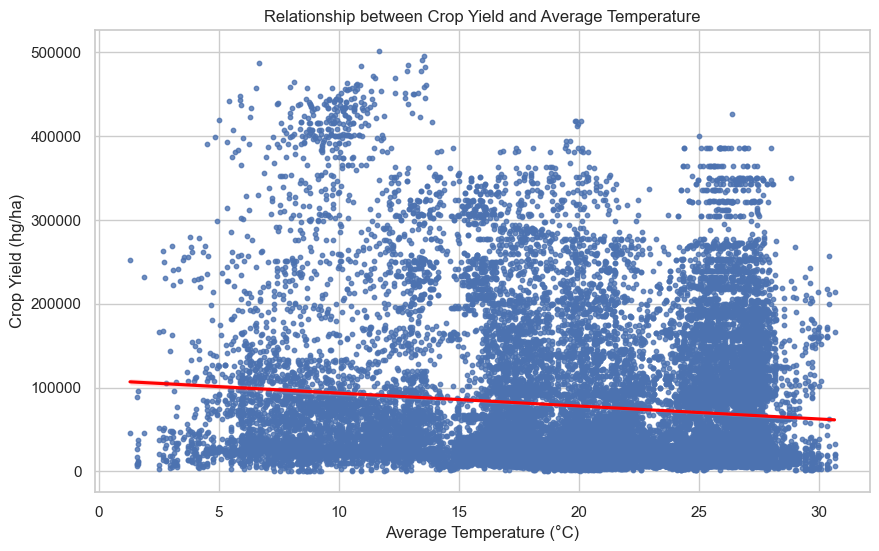

In [6]:
#Maurice
import seaborn as sns

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='avg_temp', y='hg/ha_yield', data=crop_yields_df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Relationship between Crop Yield and Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Crop Yield (hg/ha)')
plt.show()


/var/folders/gz/zygkt4mn4sd0g24rh8vb0z940000gn/T/ipykernel_98895/670354361.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_yield = crop_yields_df.groupby('Area')['hg/ha_yield'].sum().reset_index()


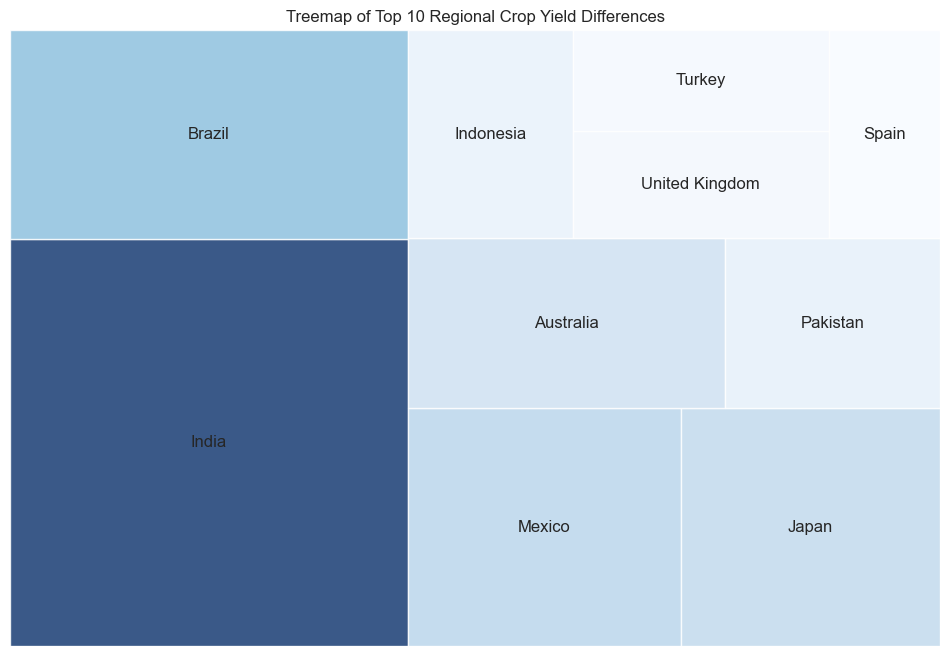

In [7]:
#Maurice
import squarify

# Calculate the average yield
average_yield = crop_yields_df['hg/ha_yield'].mean()

# Calculate the total yield for each region
region_yield = crop_yields_df.groupby('Area')['hg/ha_yield'].sum().reset_index()

# Calculate the difference from the average yield
region_yield['difference'] = region_yield['hg/ha_yield'] - average_yield

# Sort the data by yield and keep only the top 10 regions
region_yield = region_yield.sort_values(by='hg/ha_yield', ascending=False).head(10)

# Define colors based on the difference
# Normalize the differences to a range between 0 and 1
norm = plt.Normalize(region_yield['difference'].min(), region_yield['difference'].max())

# Generate colors based on the normalized differences
colors = plt.cm.Blues(norm(region_yield['difference']))

# Plot the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=region_yield['hg/ha_yield'], label=region_yield['Area'], color=colors, alpha=.8)
plt.title('Treemap of Top 10 Regional Crop Yield Differences')
plt.axis('off')
plt.show()

India's Crop Yields DataFrame:
       record_num   Area     Item  Year  hg/ha_yield  \
10502      10502  India  Cassava  1990       205381   
10503      10503  India  Cassava  1990       205381   
10504      10504  India  Cassava  1990       205381   
10505      10505  India  Cassava  1990       205381   
10506      10506  India  Cassava  1990       205381   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
10502                           1083            75000.0     25.58  
10503                           1083            75000.0     26.88  
10504                           1083            75000.0     25.79  
10505                           1083            75000.0     24.10  
10506                           1083            75000.0     25.25  
Summary Statistics for India:
         record_num   Area     Item    Year    hg/ha_yield  \
count       4048.0   4048     4048  4048.0    4048.000000   
unique      4048.0      1        8    23.0            NaN   
top        1412

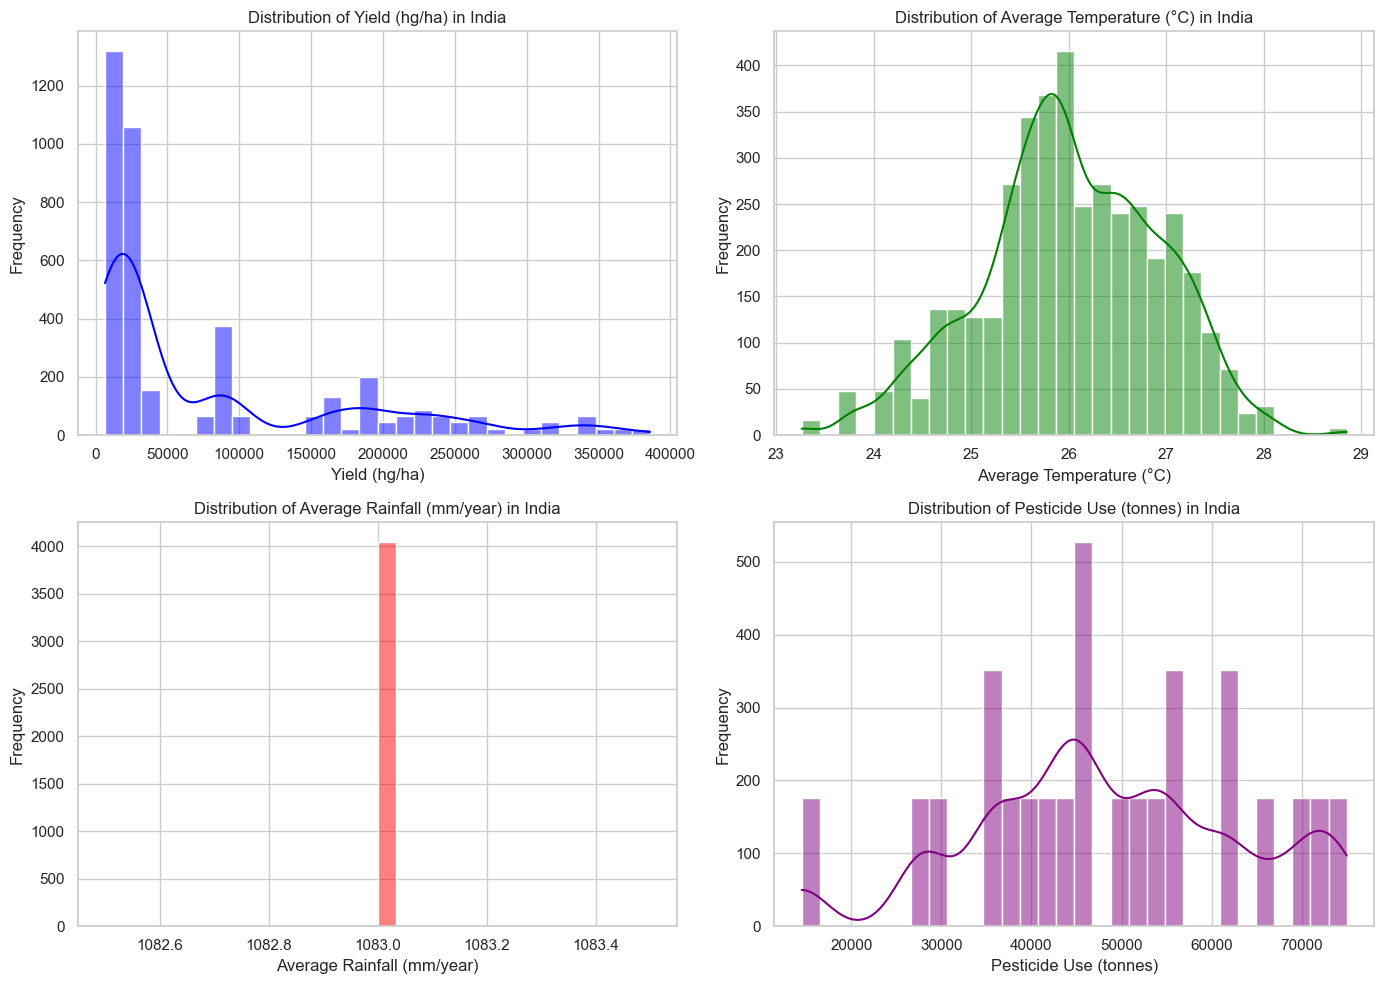

NameError: name 'india_median_yield_per_year' is not defined

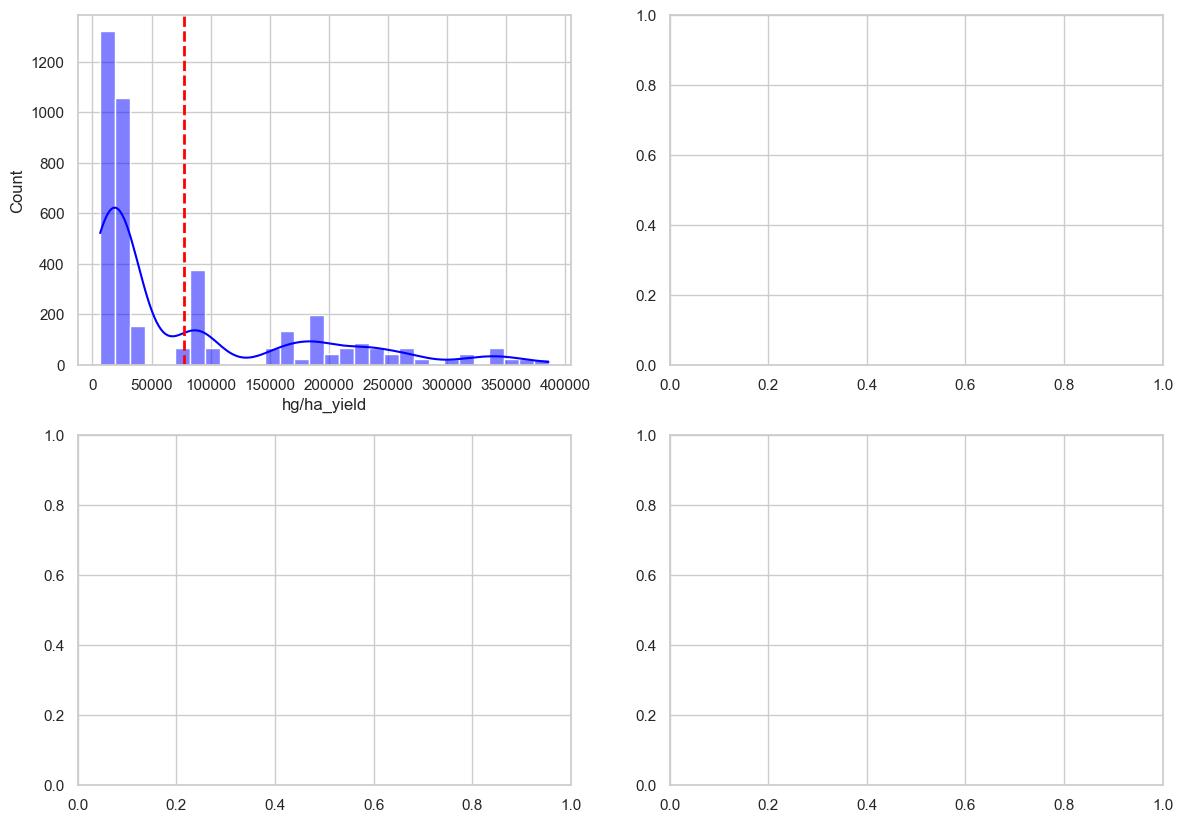

In [10]:
#Maurice
# Filter the dataframe for India
india_df = crop_yields_df[crop_yields_df['Area'] == 'India']

# Display the first few rows of the filtered dataframe
print("India's Crop Yields DataFrame:\n", india_df.head())

# Generate summary statistics for India's data
india_summary_statistics = india_df.describe(include='all')
print("Summary Statistics for India:\n", india_summary_statistics)

# Plot histograms for key variables for India
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for yield
sns.histplot(india_df['hg/ha_yield'], bins=30, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Yield (hg/ha) in India')
axes[0, 0].set_xlabel('Yield (hg/ha)')
axes[0, 0].set_ylabel('Frequency')

# Histogram for average temperature
sns.histplot(india_df['avg_temp'], bins=30, kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Average Temperature (°C) in India')
axes[0, 1].set_xlabel('Average Temperature (°C)')
axes[0, 1].set_ylabel('Frequency')

# Histogram for average rainfall
sns.histplot(india_df['average_rain_fall_mm_per_year'], bins=30, kde=True, color='red', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Average Rainfall (mm/year) in India')
axes[1, 0].set_xlabel('Average Rainfall (mm/year)')
axes[1, 0].set_ylabel('Frequency')

# Histogram for pesticide use
sns.histplot(india_df['pesticides_tonnes'], bins=30, kde=True, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Pesticide Use (tonnes) in India')
axes[1, 1].set_xlabel('Pesticide Use (tonnes)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Compare India's yield against the average and median yield
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for yield compared to average and median yield
sns.histplot(india_df['hg/ha_yield'], bins=30, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].axvline(average_yield, color='red', linestyle='dashed', linewidth=2, label='Average Yield')
axes[0, 0].axvline(india_median_yield_per_year['hg/ha_yield'].median(), color='green', linestyle='dashed', linewidth=2, label='Median Yield')
axes[0, 0].set_title('Distribution of Yield (hg/ha) in India vs Average and Median Yield')
axes[0, 0].set_xlabel('Yield (hg/ha)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Histogram for average temperature
sns.histplot(india_df['avg_temp'], bins=30, kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Average Temperature (°C) in India')
axes[0, 1].set_xlabel('Average Temperature (°C)')
axes[0, 1].set_ylabel('Frequency')

# Histogram for average rainfall
sns.histplot(india_df['average_rain_fall_mm_per_year'], bins=30, kde=True, color='red', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Average Rainfall (mm/year) in India')
axes[1, 0].set_xlabel('Average Rainfall (mm/year)')
axes[1, 0].set_ylabel('Frequency')

# Histogram for pesticide use
sns.histplot(india_df['pesticides_tonnes'], bins=30, kde=True, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Pesticide Use (tonnes) in India')
axes[1, 1].set_xlabel('Pesticide Use (tonnes)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
#Javier
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Load your CSV file into a DataFrame
# Replace 'your_file.csv' with the actual file path of your CSV
df = pd.read_csv('crop_yields.csv')

# If you're focusing only on specific columns
df = df[['Year', 'Area', 'average_rain_fall_mm_per_year', 'avg_temp']]

# Plotting with matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(df['average_rain_fall_mm_per_year'], df['avg_temp'], color='blue')
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('Average Temperature (°C)')
plt.title('Scatter Plot: Average Rainfall vs Average Temperature')
plt.show()

# Plotting with plotly (for an interactive version)
fig = px.scatter(df, 
                 x='average_rain_fall_mm_per_year', 
                 y='avg_temp', 
                 color='Year',
                 title="Interactive Scatter Plot: Average Rainfall vs Temperature",
                 labels={"average_rain_fall_mm_per_year": "Average Rainfall (mm/year)", 
                         "avg_temp": "Average Temperature (°C)"},
                 hover_name='Year')

# Show the interactive plot
fig.show()


In [ ]:
#Zach
import pandas as pd
df = pd.read_csv('crop_yields.csv')
df = df.drop('record_num', axis=1)

df = df[df['Area'] == 'India']
df = df[df['Item'] == 'Cassava']

df = df[['Year','hg/ha_yield','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp']]
df.groupby('Year').mean()

# Assuming data continues to follow a similar format, let's load the entire dataset from the file for a more comprehensive plot.
import pandas as pd  # For handling and analyzing data in a dataframe
import matplotlib.pyplot as plt  # For creating plots and visualizations
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting (if needed)

# Extract the full range of years, yields, and pesticide usage from the original dataset.
years_full = df['Year']
yield_full = df['hg/ha_yield']
pesticides_full = df['pesticides_tonnes']

# Create the line graph with the full range of data
fig, ax1 = plt.subplots()

# Plotting crop yield on the first y-axis
ax1.plot(years_full, yield_full, 'g-', label='Crop Yield (hg/ha)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Crop Yield (hg/ha)', color='g')
ax1.tick_params('y', colors='g')

# Create a second y-axis for pesticide use
ax2 = ax1.twinx()
ax2.plot(years_full, pesticides_full, 'b-', label='Pesticides Used (Tonnes)')
ax2.set_ylabel('Pesticides Used (Tonnes)', color='b')
ax2.tick_params('y', colors='b')

# Title and showing the plot
plt.title('Pesticide Use and Crop Yield Trends Over the Years')
fig.tight_layout()
plt.show()

